In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis\01 - Data'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'weather_data.csv'), index_col = False)

In [4]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
df_weather.shape

(22950, 170)

Dropping Columns for GDANSK ROMA and TOURS due to these stations not having the required amount of data.

In [6]:
# Drop columns with insufficient data

df_weather = df_weather.drop(columns=[col for col in df_weather.columns if any(keyword in col for keyword in ['GDANSK', 'ROMA', 'TOURS'])])

In [7]:
df_weather.shape

(22950, 149)

In [8]:
# Load Pleasant Weather Data

df_pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'), index_col = False)

In [9]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note that the Pleasant Weather data does not contain values for GDANSK ROMA and TOURS, so we do not have to drop these columns in this data set.

In [11]:
#Create an 'X' and y df by dropping the unneeded columns.

X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'],axis=1)

In [12]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [13]:
# shape of training and test sets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [14]:
# confirm type as dataframes

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
#converting X_test and X_train dataframes to numpy array

X_test = np.array(X_test) 
X_train = np.array(X_train)

# Decision Tree

[Text(0.36786803942708485, 0.9821428571428571, 'x[49] <= 17.95\ngini = 0.313\nsamples = 17212\nvalue = [[13005, 4207]\n[11233, 5979]\n[11656, 5556]\n[13912, 3300]\n[13540, 3672]\n[13536, 3676]\n[14419, 2793]\n[12481, 4731]\n[13672, 3540]\n[9515, 7697]\n[13679, 3533]\n[14546, 2666]\n[17212, 0]\n[14295, 2917]\n[16351, 861]]'),
 Text(0.06217990636105141, 0.9464285714285714, 'x[98] <= 17.95\ngini = 0.098\nsamples = 10807\nvalue = [[10148.0, 659.0]\n[9113.0, 1694.0]\n[9533.0, 1274.0]\n[10721.0, 86.0]\n[10807.0, 0.0]\n[10184.0, 623.0]\n[10734.0, 73.0]\n[9863.0, 944.0]\n[10751.0, 56.0]\n[8031.0, 2776.0]\n[10414.0, 393.0]\n[10542.0, 265.0]\n[10807.0, 0.0]\n[10543.0, 264.0]\n[10645.0, 162.0]]'),
 Text(0.21502397289406813, 0.9642857142857142, 'True  '),
 Text(0.01624575743711963, 0.9107142857142857, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7579\nvalue = [[7457.0, 122.0]\n[6898.0, 681.0]\n[7223.0, 356.0]\n[7564.0, 15.0]\n[7579.0, 0.0]\n[7542.0, 37.0]\n[7559.0, 20.0]\n[7362.0, 217.0]\n[7562.0, 17.

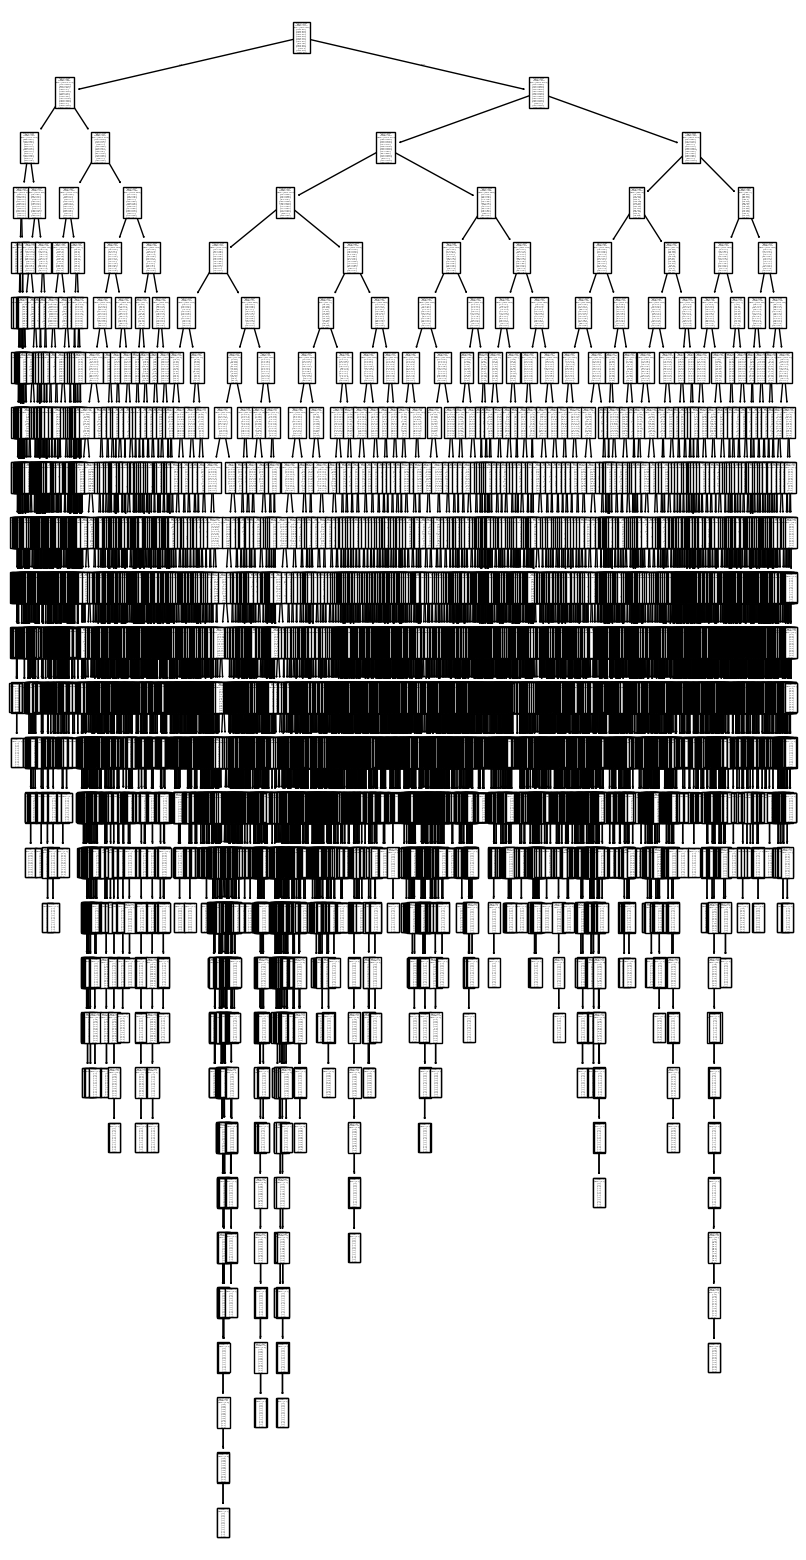

In [16]:
#Run Decision Tree classifier

activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [17]:
#cross validation method

y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6074253297887036


In [25]:
y_pred = activedt.predict(X_test)
print('Test accuracy score: ',cross_val_score(activedt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Test accuracy score:  0.5371194921920851


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4207
           1       1.00      1.00      1.00      5979
           2       1.00      1.00      1.00      5556
           3       1.00      1.00      1.00      3300
           4       1.00      1.00      1.00      3672
           5       1.00      1.00      1.00      3676
           6       1.00      1.00      1.00      2793
           7       1.00      1.00      1.00      4731
           8       1.00      1.00      1.00      3540
           9       1.00      1.00      1.00      7697
          10       1.00      1.00      1.00      3533
          11       1.00      1.00      1.00      2666
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       861

   micro avg       1.00      1.00      1.00     55128
   macro avg       0.93      0.93      0.93     55128
weighted avg       1.00   

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Josh Wattay\an

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


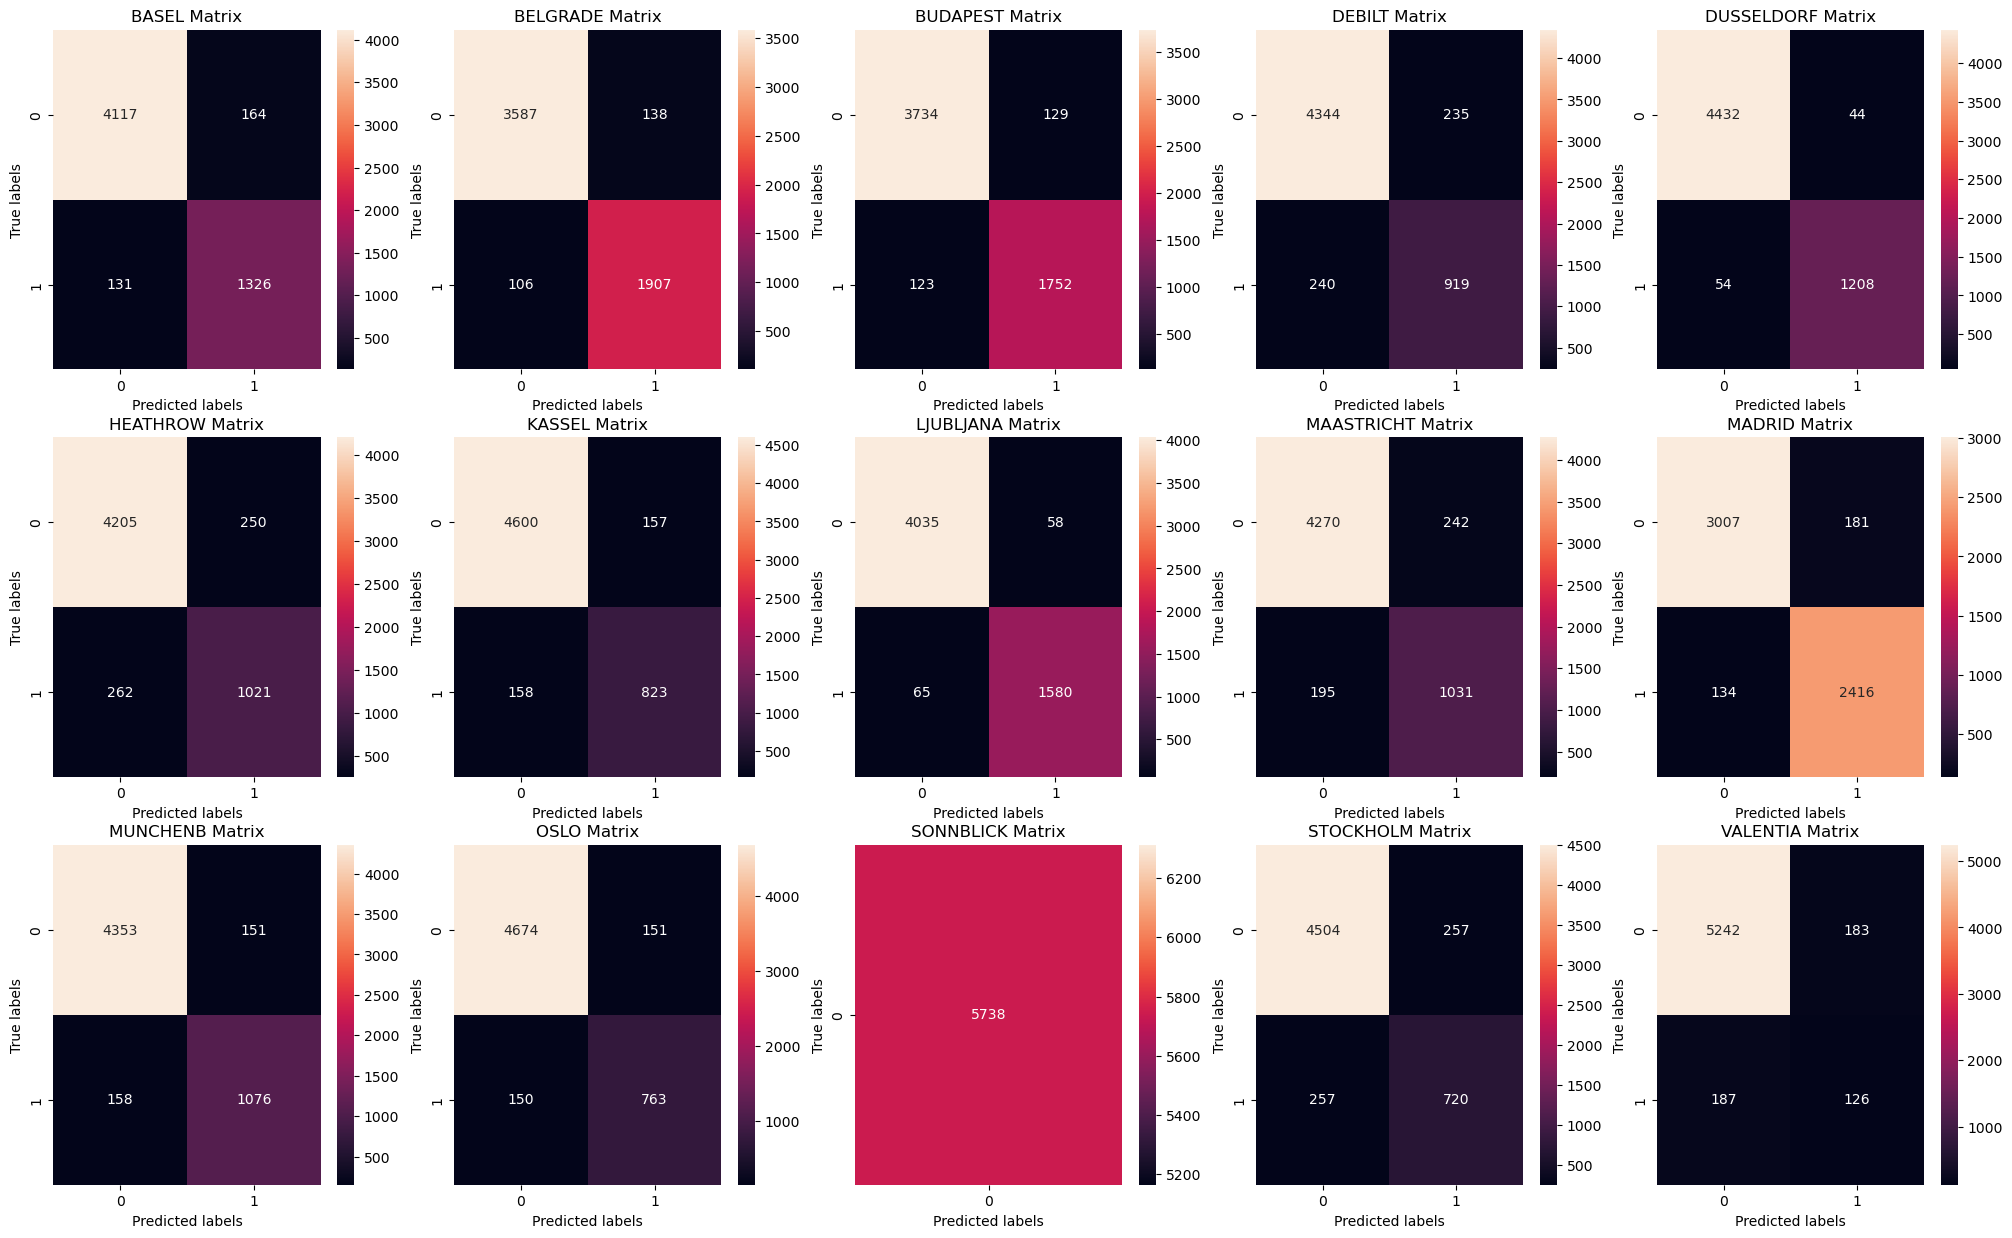

In [26]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# The decision tree does not need to be pruned because the model is underfit. With only a 60% train accuracy and 53% test accuracy, the tree needs more criteria to more accurately classify pleasant and unpleasant weather patterns.